Objective 1

In [ ]:
import pandas as pd
listings = pd.read_csv(r"C:\Users\abbyh\OneDrive\Documents\portfolio_projects\Listings.csv", encoding = "ISO-8859-1", low_memory=False)

listings.head()

#imported data 

In [ ]:
listings.info()

In [4]:
listings["host_since"] = pd.to_datetime(listings["host_since"])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

#cast dates as datetime format

In [5]:
paris_listings = ( 
listings
.query("city == 'Paris'")
.loc[:, ["host_since","neighbourhood", "city", "accommodates", "price"]]
)

paris_listings.info()
paris_listings.head()

paris_listings.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

#filtered data down to rows where the city is Paris and kept only columns 'host_since', 'neighbourhood', 'city', 'accommodations', and 'price'
#QA for missing values 
#not enough to delete

In [ ]:
paris_listings.describe()

#caluculated the min, max, and avg for each numeric field 

In [ ]:
paris_listings.query("accommodates == 0").count()

In [ ]:
paris_listings.query("price == 0 and accommodates == 0").count()

#not enough to delete 
#usually when price is 0, accomodates is 0
#not enough to affect statistics


In [ ]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.tail()

In [ ]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean"})
    .sort_values("price")
)

paris_listings_accommodates.head()

In [ ]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood" : "count",
        "price" : "mean"
    })
)

paris_listings_over_time.head()

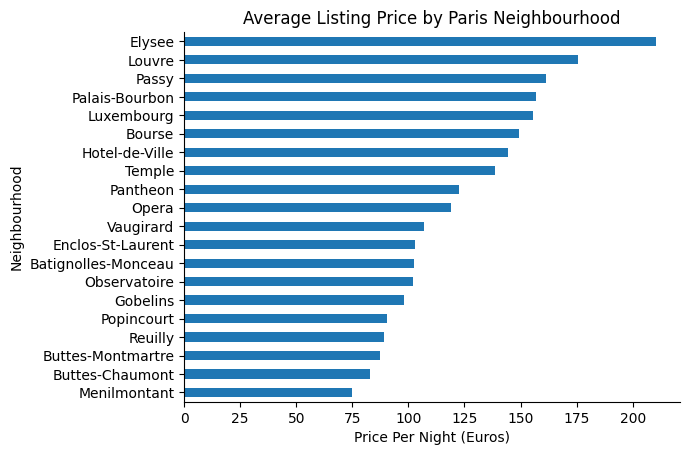

In [12]:
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighbourhood" ,
     xlabel="Price Per Night (Euros)",
     ylabel="Neighbourhood",
     legend=None
    
 )
 )

sns.despine()

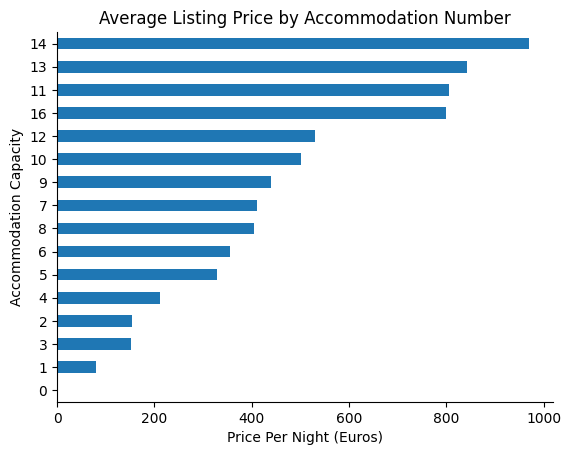

In [13]:
(paris_listings_accommodates
 .plot
 .barh(
     title="Average Listing Price by Accommodation Number" ,
     xlabel="Price Per Night (Euros)",
     ylabel="Accommodation Capacity",
     legend=None
    
 )
 )

sns.despine()

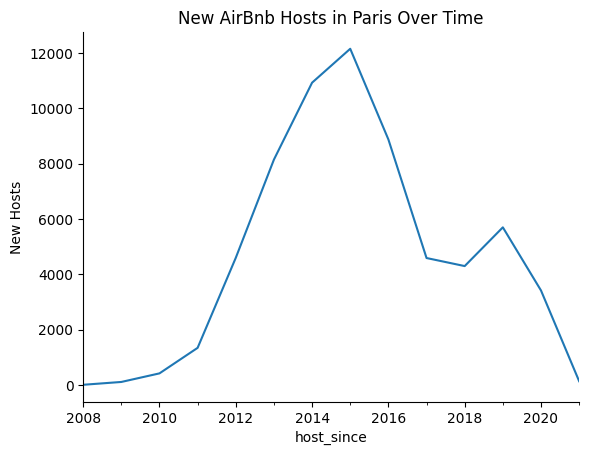

In [14]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
)

sns.despine()

#regulations and restrictions started in 2015

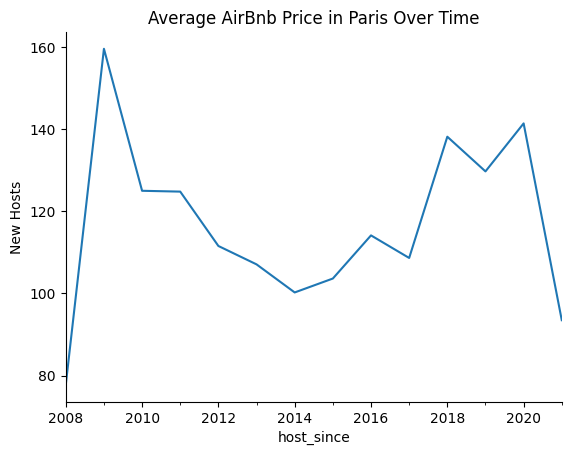

In [15]:
paris_listings_over_time["price"].plot(
    ylabel="New Hosts",
    title="Average AirBnb Price in Paris Over Time"
)

sns.despine()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    listings, 
    lat='latitude', 
    lon='longitude', 
    hover_name= 'neighbourhood',  # To display the neighborhood name on hover
    hover_data={'latitude': False, 'longitude': False, 'name': True},  # Customize hover data
    zoom=12,  # Set a zoom level for the map
    height=600
)

# Set the map style and access token for mapbox
fig.update_layout(
    mapbox_style="open-street-map",
    title="Neighborhoods in Paris",
)

# Show the figure
fig.show()
